In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('garmin/Activities.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             120 non-null    object 
 1   Date                      120 non-null    object 
 2   Favorite                  120 non-null    bool   
 3   Title                     120 non-null    object 
 4   Distance                  120 non-null    float64
 5   Calories                  120 non-null    int64  
 6   Time                      120 non-null    object 
 7   Avg HR                    120 non-null    object 
 8   Max HR                    120 non-null    object 
 9   Avg Run Cadence           120 non-null    object 
 10  Max Run Cadence           120 non-null    object 
 11  Avg Pace                  120 non-null    object 
 12  Best Pace                 120 non-null    object 
 13  Total Ascent              120 non-null    object 
 14  Total Desc

In [43]:
df = df[['Date', 'Distance','Calories','Avg HR','Max HR','Avg Run Cadence','Max Run Cadence', 'Avg Pace', 'Best Pace', 
         'Avg Stride Length', 'Elapsed Time','Total Ascent']]


In [44]:
import numpy as np
df.replace('--', np.nan, inplace=True)


In [45]:
#convert 'Date', 'Avg Pace', 'Best Pace', 'Elapsed Time' objects to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Avg Pace'] = pd.to_datetime(df['Avg Pace'], format='%M:%S')
df['Best Pace'] = pd.to_datetime(df['Best Pace'], format='%M:%S')
df['Elapsed Time'] = pd.to_datetime(df['Elapsed Time'])

C:\Users\g.velasquez\AppData\Local\Temp\ipykernel_18520\3531579023.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Elapsed Time'] = pd.to_datetime(df['Elapsed Time'])


In [46]:
#convert 'Avg Pace', 'Best Pace', 'Elapced Time' objects to the number of minutes
df['Avg Pace'] = df['Avg Pace'].dt.hour*60 + df['Avg Pace'].dt.minute + df['Avg Pace'].dt.second/60
df['Best Pace'] = df['Best Pace'].dt.hour*60 + df['Best Pace'].dt.minute + df['Best Pace'].dt.second/60
df['Elapsed Time'] = df['Elapsed Time'].dt.hour*60 + df['Elapsed Time'].dt.minute + df['Elapsed Time'].dt.second/60


In [47]:
#add 'Avg Speed' and 'Best Speed' columns
df['Avg Speed'] = 60 / df['Avg Pace']
df['Best Speed'] = 60 / df['Best Pace']

In [48]:
#convert remaining columns of object type to float64
s = df.select_dtypes(include='object').columns
df[s] = df[s].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               120 non-null    datetime64[ns]
 1   Distance           120 non-null    float64       
 2   Calories           120 non-null    int64         
 3   Avg HR             118 non-null    float64       
 4   Max HR             118 non-null    float64       
 5   Avg Run Cadence    119 non-null    float64       
 6   Max Run Cadence    118 non-null    float64       
 7   Avg Pace           120 non-null    float64       
 8   Best Pace          118 non-null    float64       
 9   Avg Stride Length  119 non-null    float64       
 10  Elapsed Time       120 non-null    float64       
 11  Total Ascent       91 non-null     float64       
 12  Avg Speed          120 non-null    float64       
 13  Best Speed         118 non-null    float64       
dtypes: datetim

In [49]:
df[df.isin(['--']).any(axis=1)]
# Sort by datetime
df = df.sort_values('Date', ascending=True)

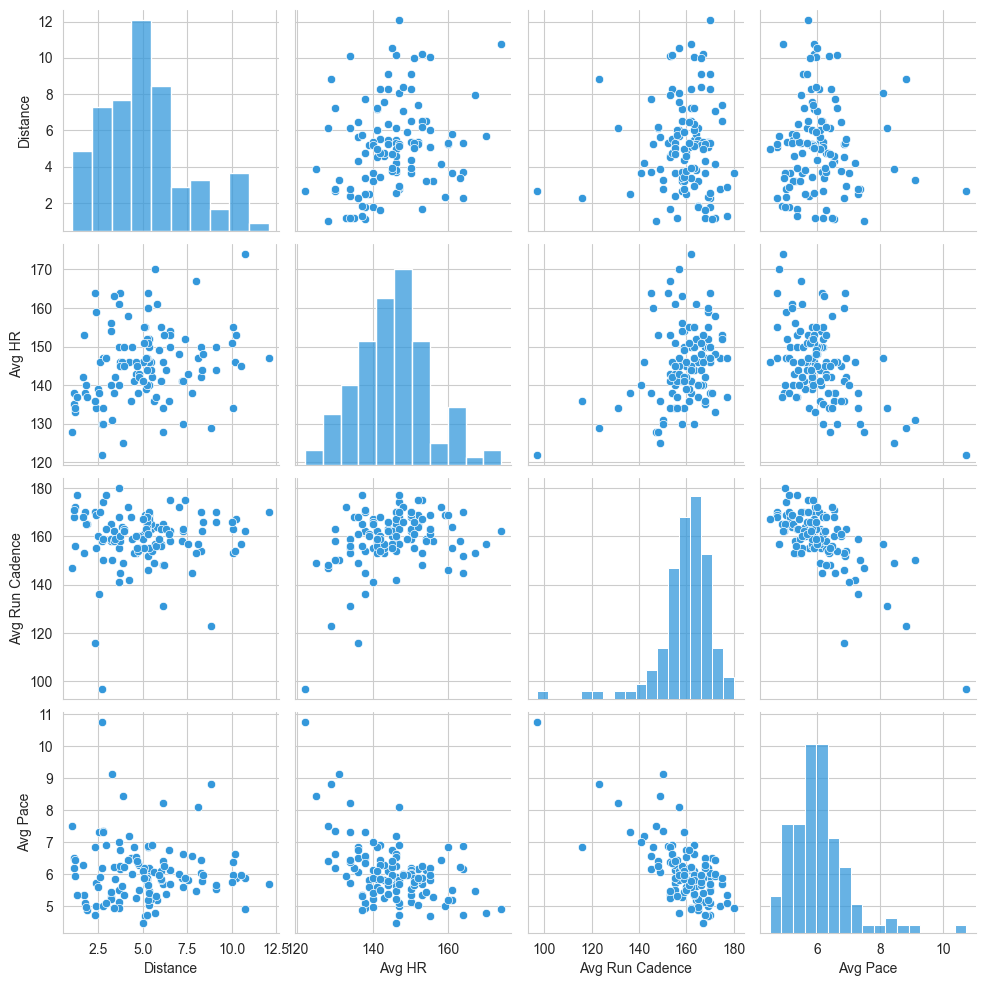

In [50]:
sns.pairplot(df, 
             x_vars=['Distance','Avg HR','Avg Run Cadence','Avg Pace'],
             y_vars=['Distance','Avg HR','Avg Run Cadence','Avg Pace'],
             )

In [51]:
def classify_distance(distance):
    if distance <= 4:
        return 'Short'
    elif 4 < distance <= 7:
        return 'Medium'
    else:
        return 'Long'

df['Distance_Category'] = df['Distance'].apply(classify_distance)


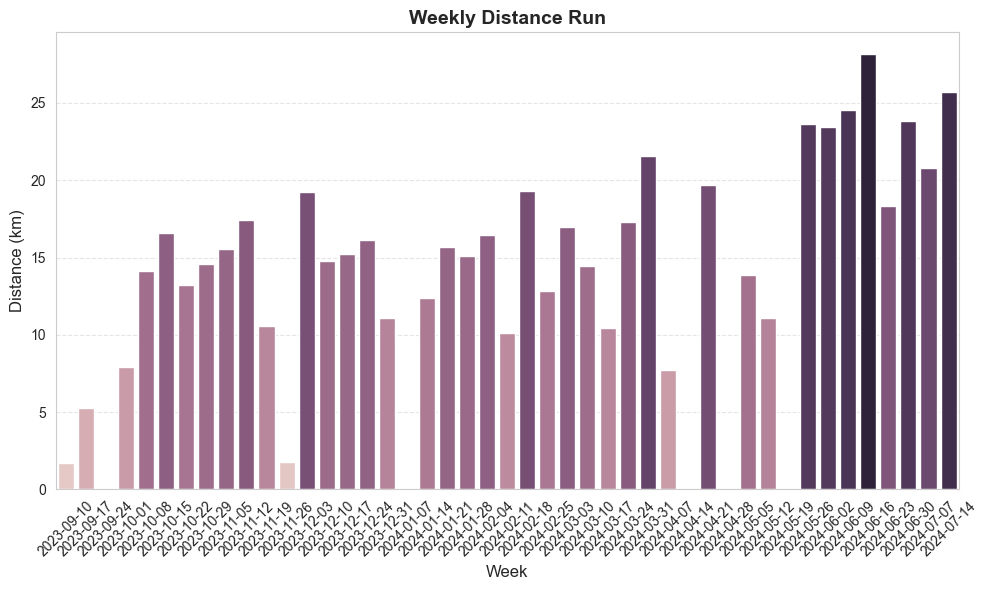

In [52]:
# Set 'Date' as the index
dfi = df.copy()
dfi.set_index('Date', inplace=True)

# Calculate weekly total distance
weekly_distance = dfi['Distance'].resample('W').sum()

plt.figure(figsize=(10, 6))
# Set Seaborn style
sns.set_style('whitegrid')
custom_palette = sns.color_palette(["#3498db", "#e74c3c", "#2ecc71"])
sns.set_palette(custom_palette)

# Create a bar plot
#sns.barplot(x=weekly_distance.index, y=weekly_distance, color='skyblue', edgecolor='black', alpha=0.8, width=5)
sns.barplot(x=weekly_distance.index, y=weekly_distance, hue=weekly_distance,  dodge=False)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Distance (km)', fontsize=12)
plt.title('Weekly Distance Run', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add dashed grid lines
plt.tight_layout()  # Adjust spacing
plt.legend().set_visible(False)
plt.show()


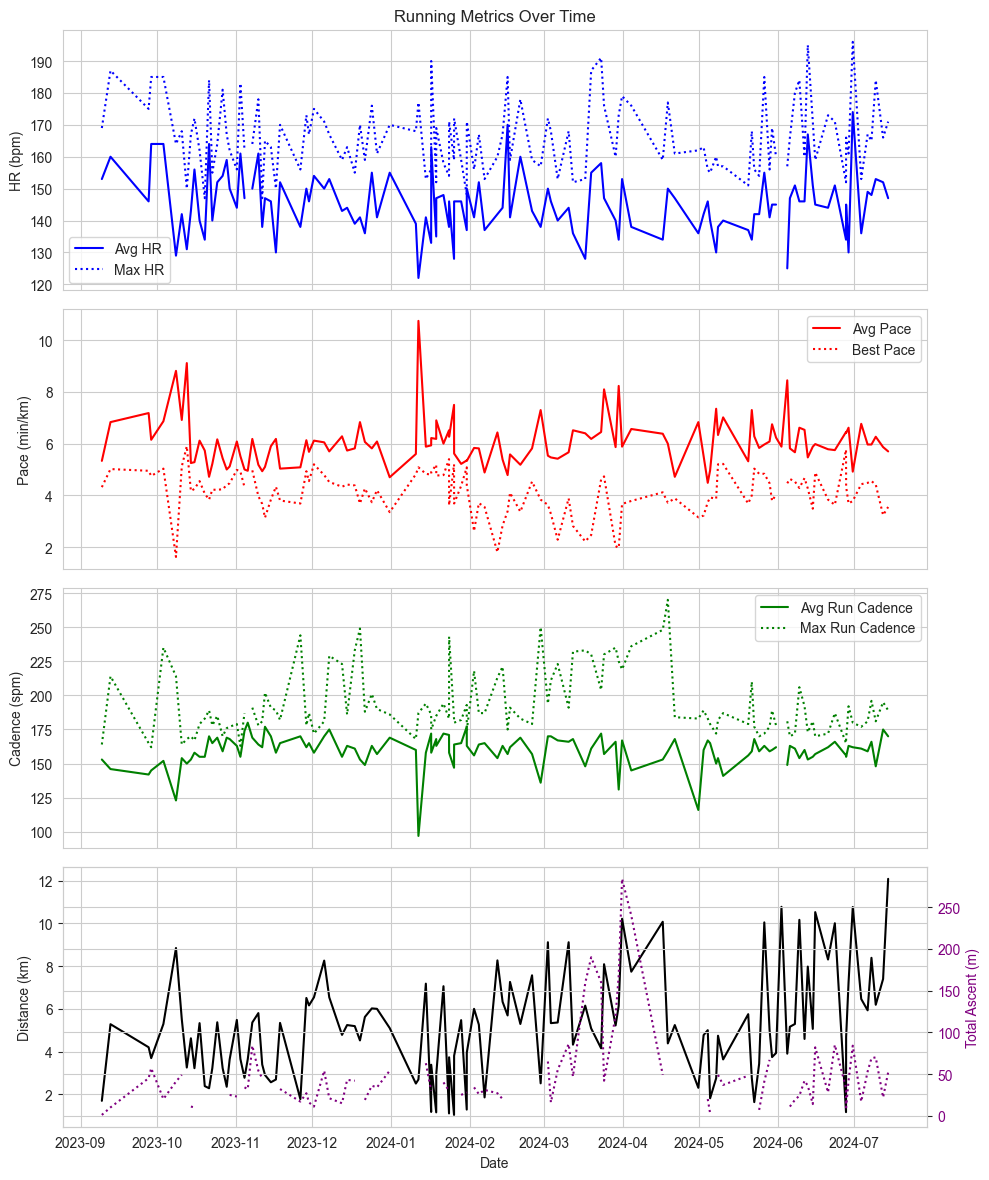

In [40]:


# Create a multi-subplot
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot Avg HR
axs[0].plot(df['Date'], df['Avg HR'], label='Avg HR', color='blue')
axs[0].plot(df['Date'], df['Max HR'], label='Max HR', linestyle=':', color='blue')
axs[0].set_ylabel('HR (bpm)')
axs[0].grid(True)
axs[0].legend()

# Plot Avg Pace
axs[1].plot(df['Date'], df['Avg Pace'], label='Avg Pace', color='red')
axs[1].plot(df['Date'], df['Best Pace'], label='Best Pace', linestyle=':', color='red')
axs[1].set_ylabel('Pace (min/km)')
axs[1].grid(True)
axs[1].legend()

# Plot Avg Run Cadence
axs[2].plot(df['Date'], df['Avg Run Cadence'], label='Avg Run Cadence', color='green')
axs[2].plot(df['Date'], df['Max Run Cadence'], label='Max Run Cadence', linestyle=':', color='green')
axs[2].set_ylabel('Cadence (spm)')
axs[2].grid(True)
axs[2].legend()

# Plot Distance
axs[3].plot(df['Date'], df['Distance'], label='Distance', color='black')
axs[3].set_ylabel('Distance (km)')
axs[3].set_xlabel('Date')
axs[3].grid(True)


# Add secondary axis for Total Ascent
axs2 = axs[3].twinx()  # Create a twin Axes sharing the same x-axis
axs2.plot(df['Date'], df['Total Ascent'], label='Total Ascent', linestyle=':', color='purple')
axs2.set_ylabel('Total Ascent (m)', color='purple')
axs2.tick_params(axis='y', labelcolor='purple')
#axs[3].legend()
#axs2.legend()
# Add a title
plt.suptitle('Running Metrics Over Time')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

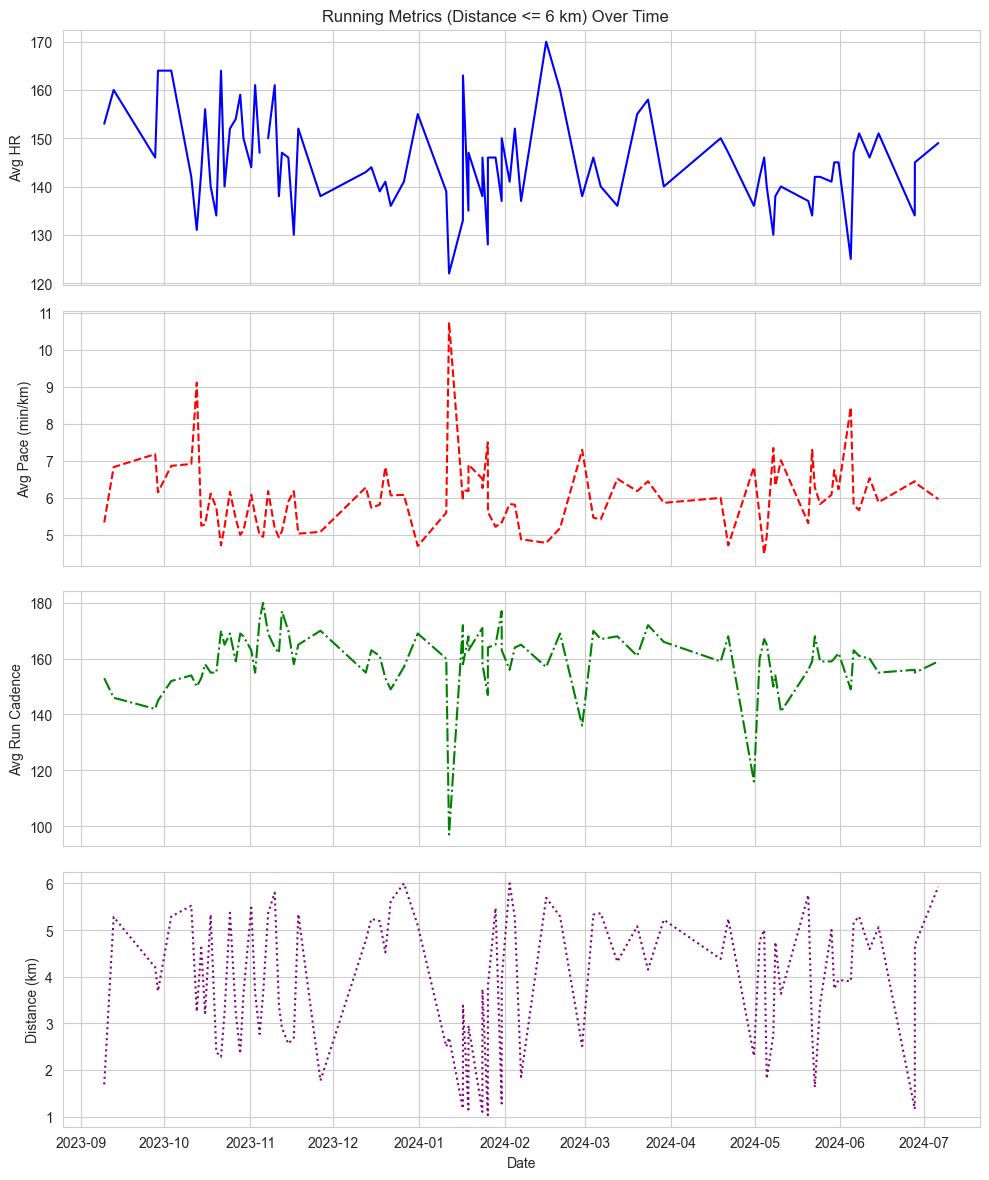

In [17]:
# Filter runs with distance <= 6 km
df_filtered = df[df['Distance'] <= 6.0]

# Sort by datetime
df_filtered = df_filtered.sort_values('Date', ascending=True)

# Create a multi-subplot
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot Avg HR
axs[0].plot(df_filtered['Date'], df_filtered['Avg HR'], label='Avg HR', color='blue')
axs[0].set_ylabel('Avg HR')
axs[0].grid(True)

# Plot Avg Pace
axs[1].plot(df_filtered['Date'], df_filtered['Avg Pace'], label='Avg Pace', linestyle='--', color='red')
axs[1].set_ylabel('Avg Pace (min/km)')
axs[1].grid(True)

# Plot Avg Run Cadence
axs[2].plot(df_filtered['Date'], df_filtered['Avg Run Cadence'], label='Avg Run Cadence', linestyle='-.', color='green')
axs[2].set_ylabel('Avg Run Cadence')
axs[2].grid(True)

# Plot Distance
axs[3].plot(df_filtered['Date'], df_filtered['Distance'], label='Distance', linestyle=':', color='purple')
axs[3].set_ylabel('Distance (km)')
axs[3].set_xlabel('Date')
axs[3].grid(True)



# Add a title
plt.suptitle('Running Metrics (Distance <= 6 km) Over Time')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

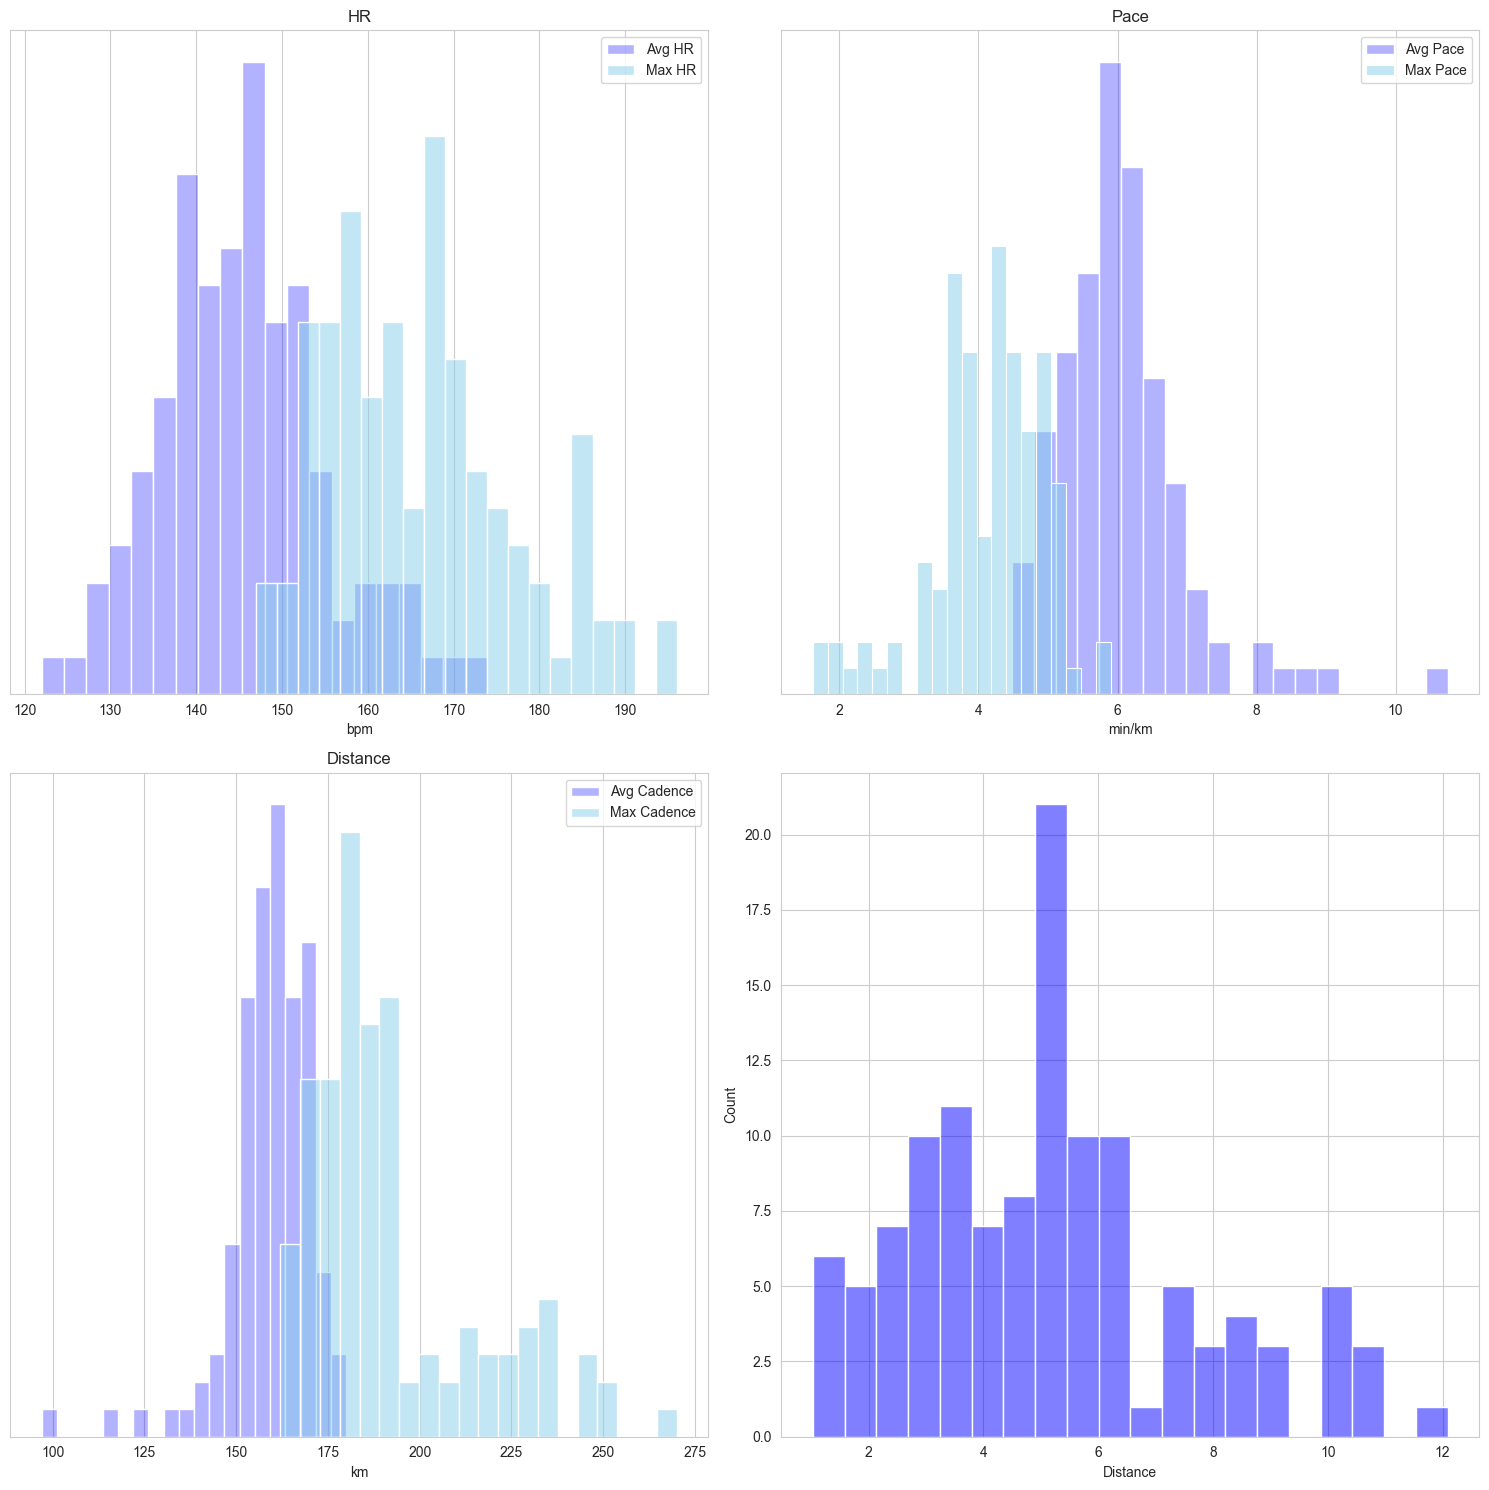

In [60]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Subplot HR
sns.histplot(df['Avg HR'], bins=20, ax=axes[0], color='blue', alpha=0.3, label='Avg HR')
sns.histplot(df['Max HR'], bins=20, ax=axes[0], color='skyblue', alpha=0.5, label='Max HR')
axes[0].set_title('HR')
axes[0].set_xlabel('bpm')
axes[0].set_ylabel('')
axes[0].yaxis.set_ticks([])  # Remove y-axis ticks
axes[0].legend()

# Subplot Pace
sns.histplot(df['Avg Pace'], bins=20, ax=axes[1], color='blue', alpha=0.3, label='Avg Pace')
sns.histplot(df['Best Pace'], bins=20, ax=axes[1], color='skyblue', alpha=0.5, label='Max Pace')
axes[1].set_title('Pace')
axes[1].set_xlabel('min/km')
axes[1].set_ylabel('')
axes[1].yaxis.set_ticks([])  # Remove y-axis ticks
axes[1].legend()

# Subplot Cadence
sns.histplot(df['Avg Run Cadence'], bins=20, ax=axes[2], color='blue', alpha=0.3, label='Avg Cadence')
sns.histplot(df['Max Run Cadence'], bins=20, ax=axes[2], color='skyblue', alpha=0.5, label='Max Cadence')
axes[2].set_title('Cadence')
axes[2].set_xlabel('spm')
axes[2].set_ylabel('')
axes[2].yaxis.set_ticks([])  # Remove y-axis ticks
axes[2].legend()

# Subplot Distance
sns.histplot(df['Distance'], bins=20, ax=axes[3], color='blue', alpha=0.5, label='Distance')
#axes[2].hist(df['Max Run Cadence'], bins=20, color='skyblue', alpha=0.5, label='Max Cadence')
axes[2].set_title('Distance')
axes[2].set_xlabel('km')
axes[2].set_ylabel('')
axes[2].yaxis.set_ticks([])  # Remove y-axis ticks
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


[Text(0.5, 1.0, 'Average HR Distribution')]

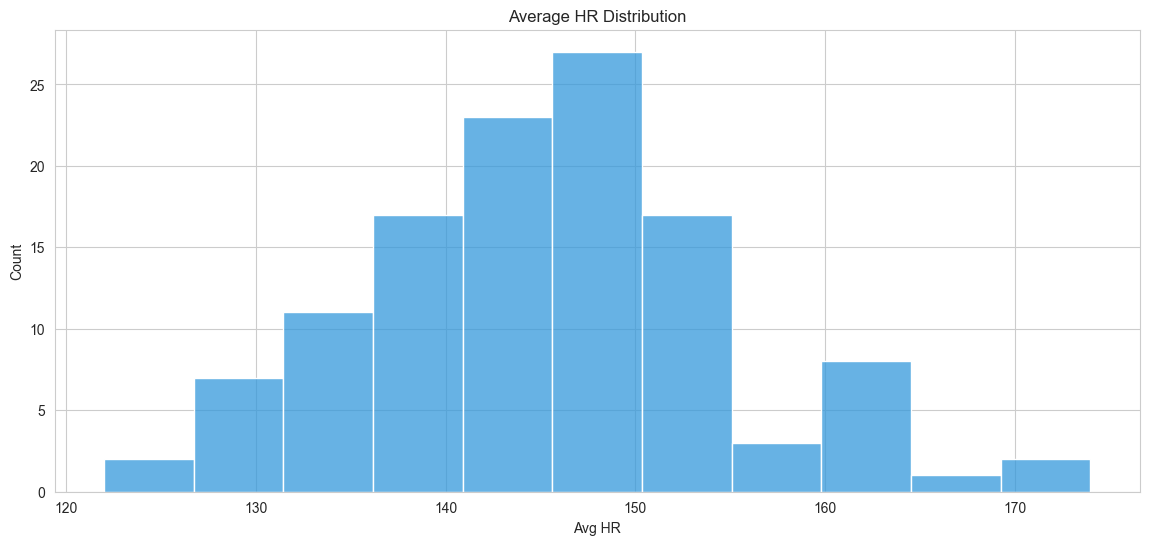

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.histplot(data = df, x='Avg HR').set(title = 'Average HR Distribution')

[Text(0.5, 1.0, 'Average Speed')]

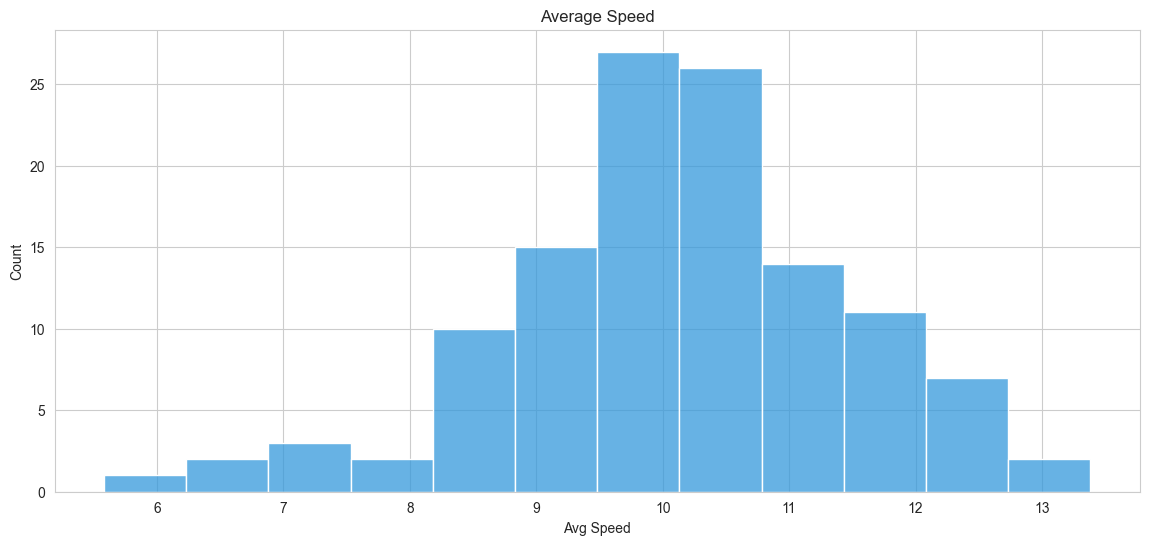

In [19]:
plt.figure(figsize=(14,6))
sns.histplot(data = df, x='Avg Speed').set(title = 'Average Speed')

[Text(0.5, 1.0, 'Average Pace')]

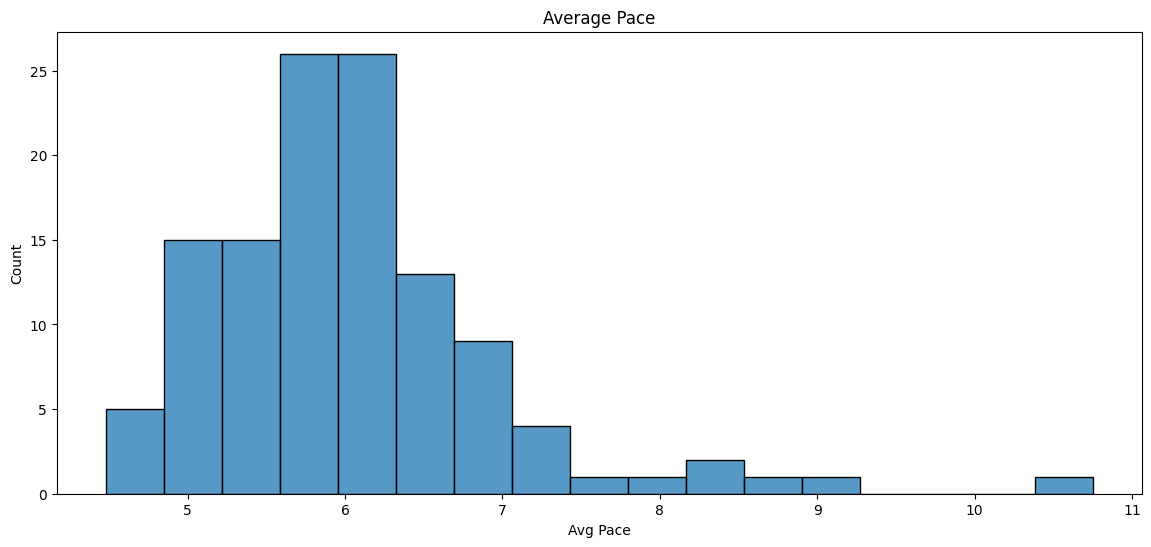

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data = df, x='Avg Pace').set(title = 'Average Pace')

[Text(0.5, 1.0, 'Best Pace')]

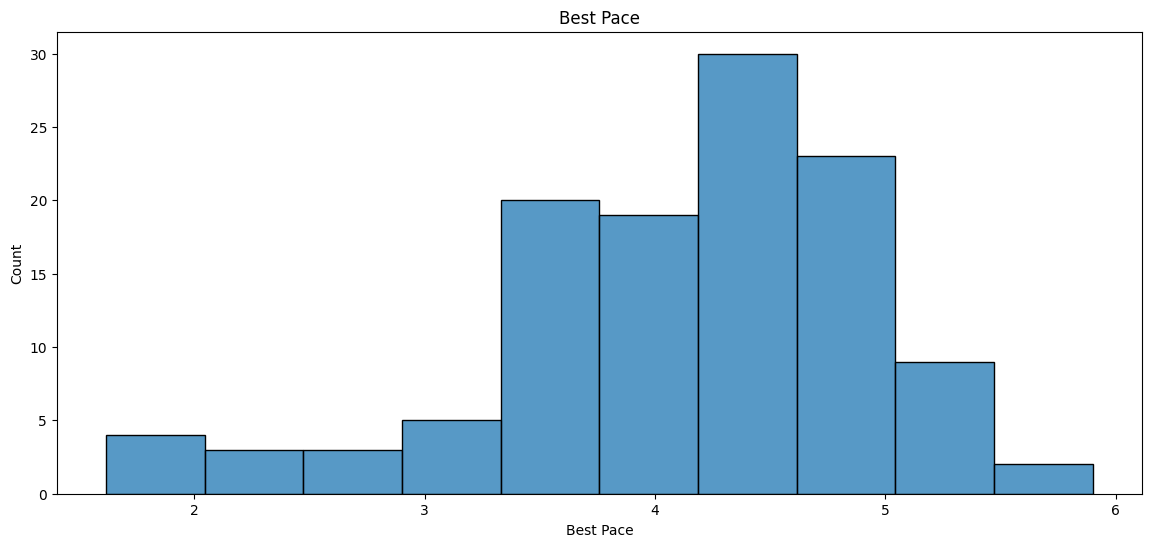

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data = df, x='Best Pace').set(title = 'Best Pace')

[Text(0.5, 1.0, 'Distance')]

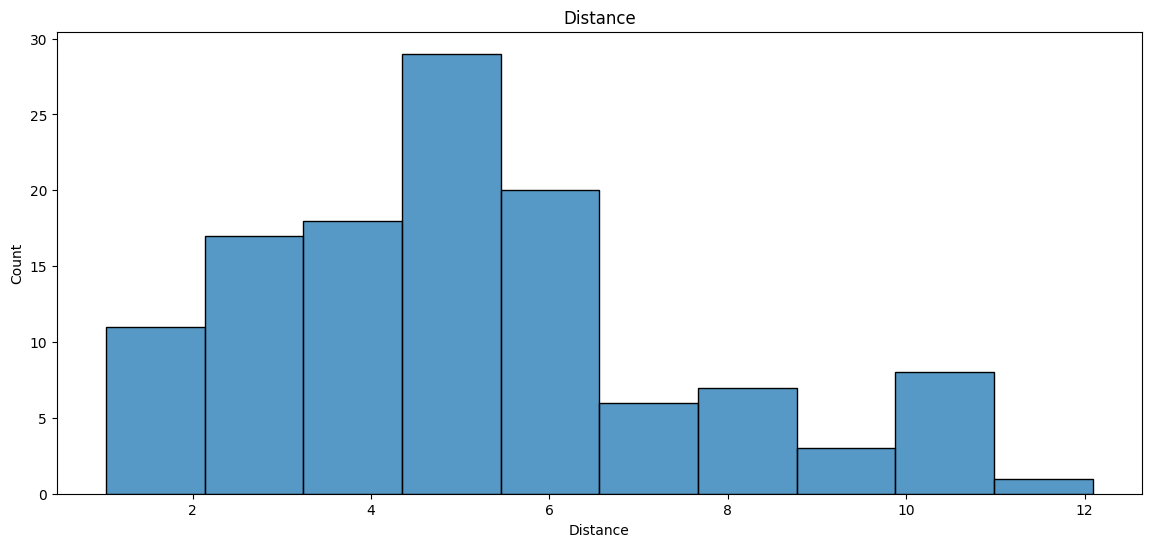

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data = df, x='Distance').set(title = 'Distance')

Correlation coefficient between cadence and speed: 0.63519158552792


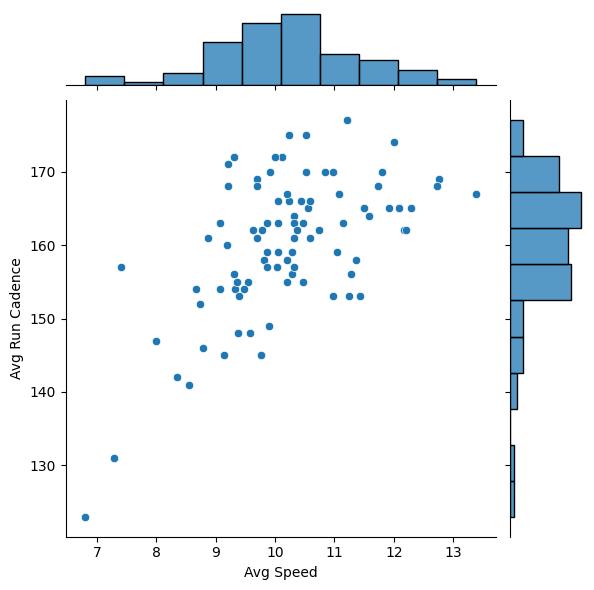

In [ ]:
sns.jointplot(x='Avg Speed',y='Avg Run Cadence', data=df.dropna(),kind='scatter')
print("Correlation coefficient between cadence and speed:", df['Avg Speed'].corr(df['Avg Run Cadence']))

Correlation coefficient between HR and speed: 0.6161759056878803


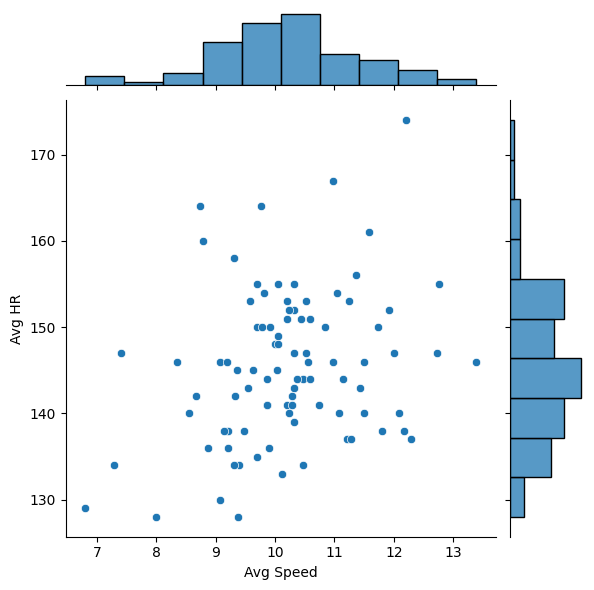

In [ ]:
sns.jointplot(x='Avg Speed',y='Avg HR', data=df.dropna(),kind='scatter')
print("Correlation coefficient between HR and speed:", df['Avg Speed'].corr(df['Avg Stride Length']))

Correlation coefficient between stride length and speed: 0.6161759056878803


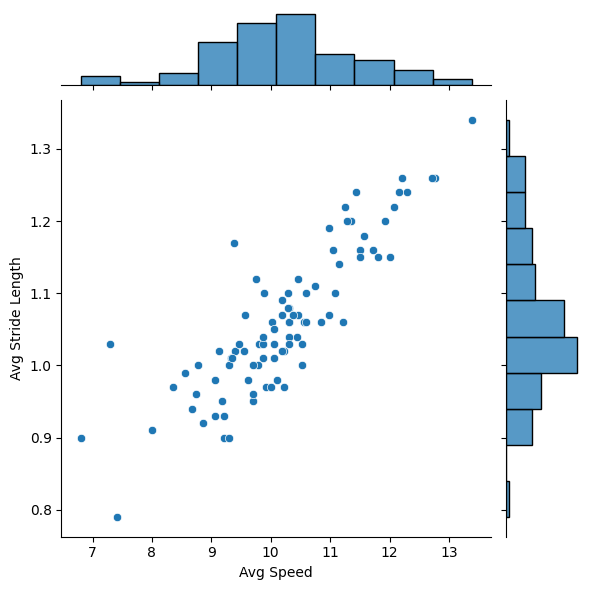

In [ ]:
sns.jointplot(x='Avg Speed',y='Avg Stride Length', data=df.dropna(),kind='scatter')
print("Correlation coefficient between stride length and speed:", df['Avg Speed'].corr(df['Avg Stride Length']))

Correlation coefficient between stride length and run cadence: 0.027369462122615998


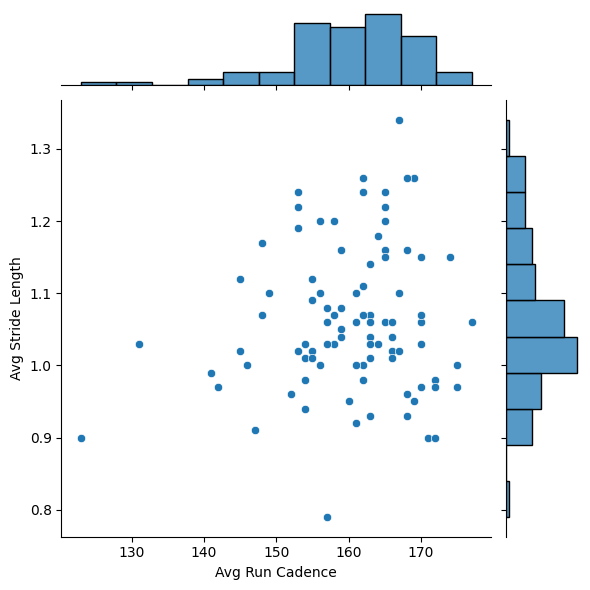

In [ ]:
sns.jointplot(x='Avg Run Cadence',y='Avg Stride Length', data=df.dropna(),kind='scatter')
print("Correlation coefficient between stride length and run cadence:", 
      df['Avg Run Cadence'].corr(df['Avg Stride Length'].dropna()))

C:\Users\g.velasquez\AppData\Local\Temp\ipykernel_18596\77391833.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month',y='Avg Speed', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Speed by Month')
C:\Users\g.velasquez\AppData\Local\Temp\ipykernel_18596\77391833.py:7: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Month',y='Avg Speed', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Speed by Month')


[Text(0.5, 1.0, 'Avg Speed by Month')]

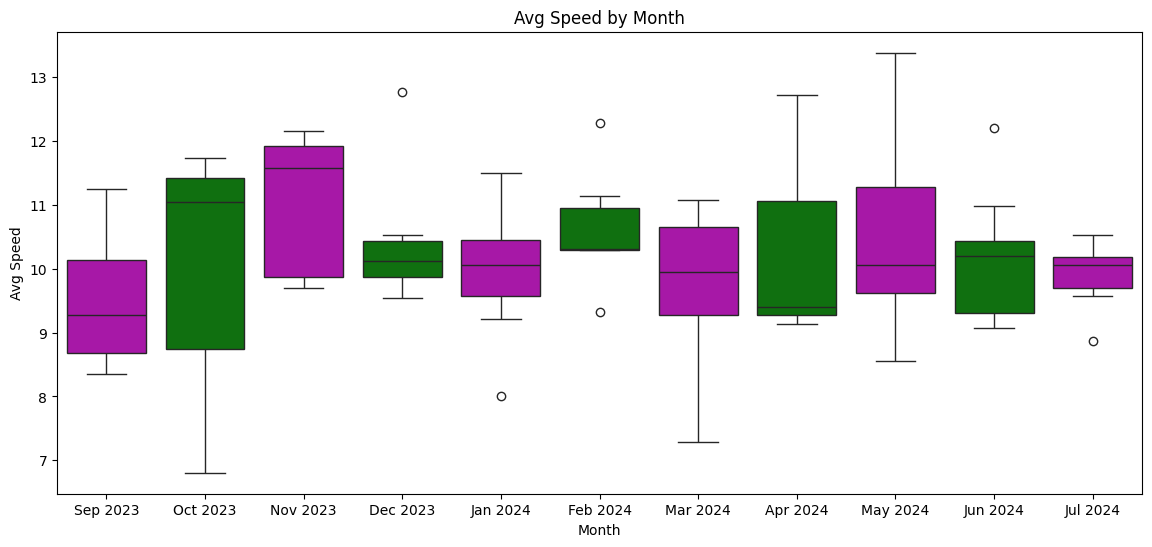

In [ ]:
plt.figure(figsize=(14,6))
#add extra column with month for every running session
df['Month'] = df['Date'].dt.strftime('%b') + " " + df['Date'].dt.strftime('%Y') 
#sort datataset by date in ascending order
df.sort_values(by='Date', inplace=True)
#plot boxplots grouped by month
sns.boxplot(x='Month',y='Avg Speed', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Speed by Month')

C:\Users\g.velasquez\AppData\Local\Temp\ipykernel_18596\3939349491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month',y='Avg Run Cadence', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Run Cadence by Month')
C:\Users\g.velasquez\AppData\Local\Temp\ipykernel_18596\3939349491.py:2: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Month',y='Avg Run Cadence', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Run Cadence by Month')


[Text(0.5, 1.0, 'Avg Run Cadence by Month')]

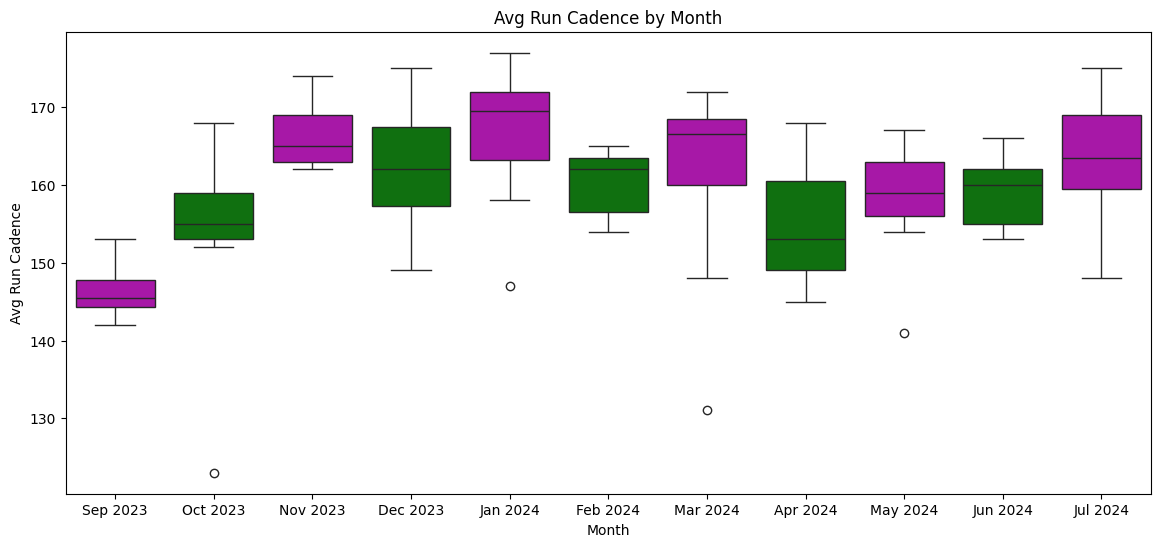

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Month',y='Avg Run Cadence', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Run Cadence by Month')

C:\Users\g.velasquez\AppData\Local\Temp\ipykernel_18596\449519541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month',y='Avg Stride Length', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Stride Length by Month')
C:\Users\g.velasquez\AppData\Local\Temp\ipykernel_18596\449519541.py:2: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Month',y='Avg Stride Length', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Stride Length by Month')


[Text(0.5, 1.0, 'Avg Stride Length by Month')]

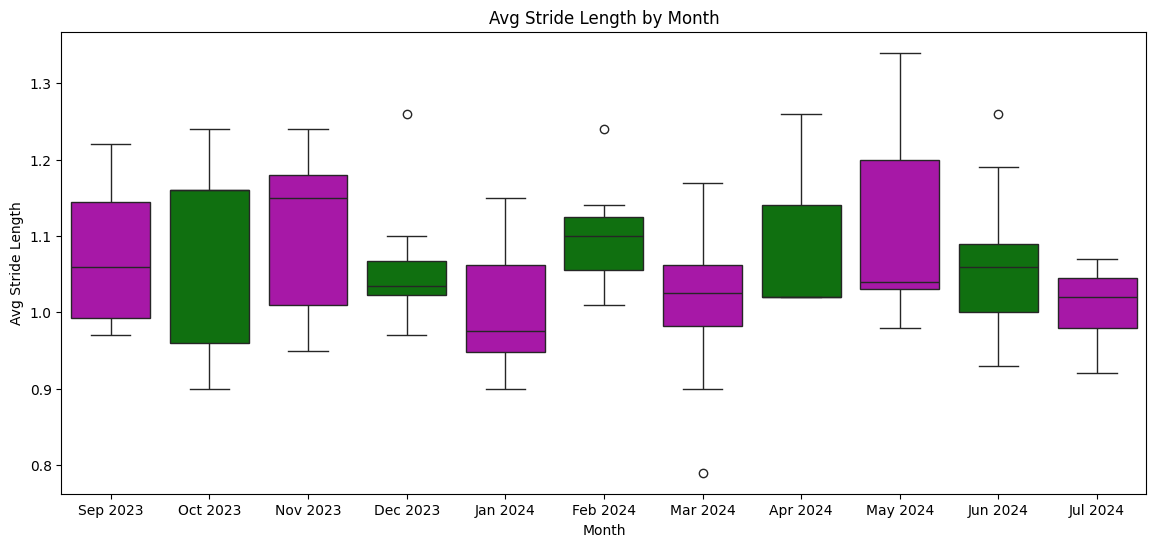

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Month',y='Avg Stride Length', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Stride Length by Month')

In [ ]:
df['Count'] = 1
#aggregate data by week
dfW = df.groupby(pd.Grouper(key='Date',freq='W')).agg({'Count':'sum','Distance':'sum',
'Calories':'sum','Avg HR':'mean','Avg Run Cadence':'mean', 'Avg Speed':'mean','Best Speed':'mean', 
'Avg Pace':'mean', 'Best Pace':'mean', 'Avg Stride Length':'mean', 'Elapsed Time':'mean'}).reset_index()

dfW.head()

,Date,Count,Distance,Calories,Avg HR,Avg Run Cadence,Avg Speed,Best Speed,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time
0,2023-09-10,1,1.69,113,153.0,153.0,11.250000,13.899614,5.333333,4.316667,1.220,9.083333
1,2023-09-17,1,5.28,488,160.0,146.0,8.780488,11.960133,6.833333,5.016667,1.000,39.183333
2,2023-09-24,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-01,2,7.89,605,155.0,143.5,9.054383,12.376396,6.666667,4.850000,1.045,26.875000
4,2023-10-08,2,14.14,1031,146.5,137.5,7.771579,24.516966,7.841667,3.325000,0.930,57.483333


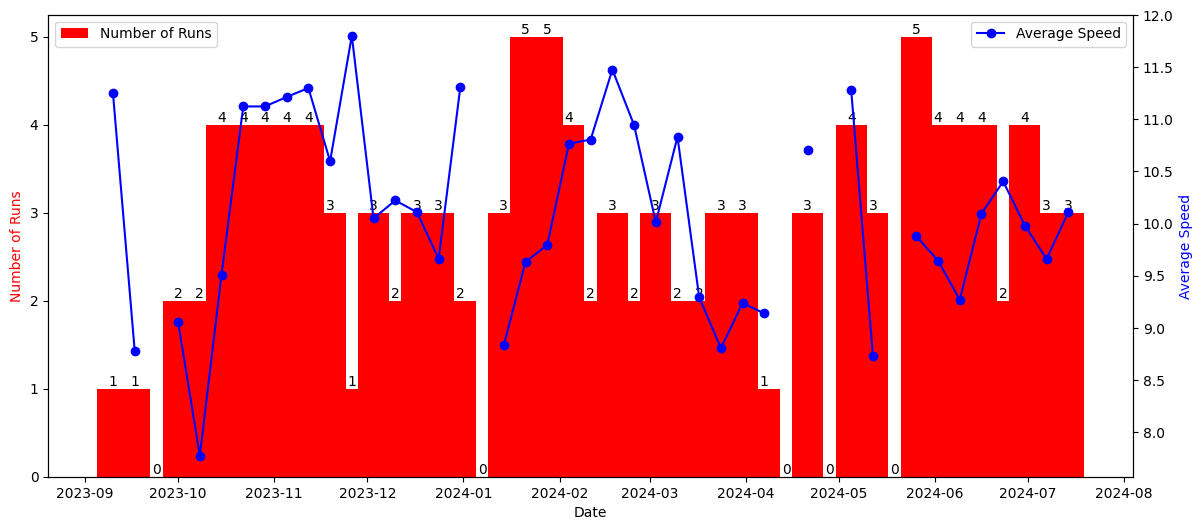

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(14,6))
# make a barplot
count = ax.bar(dfW['Date'], dfW['Count'],width=10, color='red',label='Number of Runs')
ax.bar_label(count)
# set x-axis label
ax.set_xlabel('Date')
ax.legend(loc=2)
# set y-axis label
ax.set_ylabel('Number of Runs',color='red')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfW['Date'],dfW['Avg Speed'],color='blue',marker='o',label='Average Speed')
ax2.set_ylabel('Average Speed',color='blue')
ax2.legend()
plt.show()

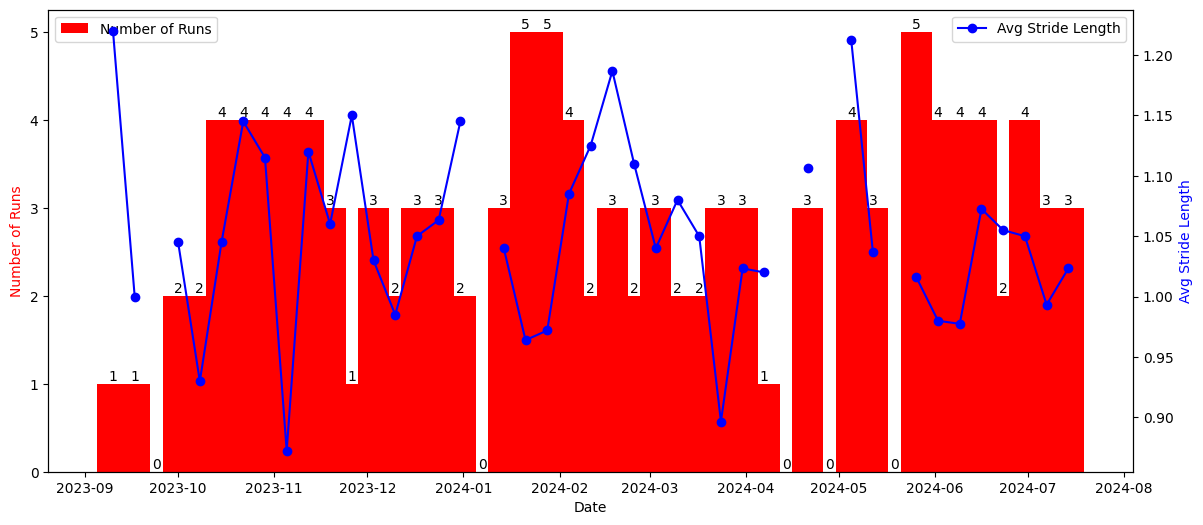

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(14,6))
# make a barplot
count = ax.bar(dfW['Date'], dfW['Count'],width=10, color='red',label='Number of Runs')
ax.bar_label(count)
# set x-axis label
ax.set_xlabel('Date')
ax.legend(loc=2)
# set y-axis label
ax.set_ylabel('Number of Runs',color='red')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfW['Date'],dfW['Avg Stride Length'],color='blue',marker='o',label='Avg Stride Length')
ax2.set_ylabel('Avg Stride Length',color='blue')
ax2.legend()
plt.show()

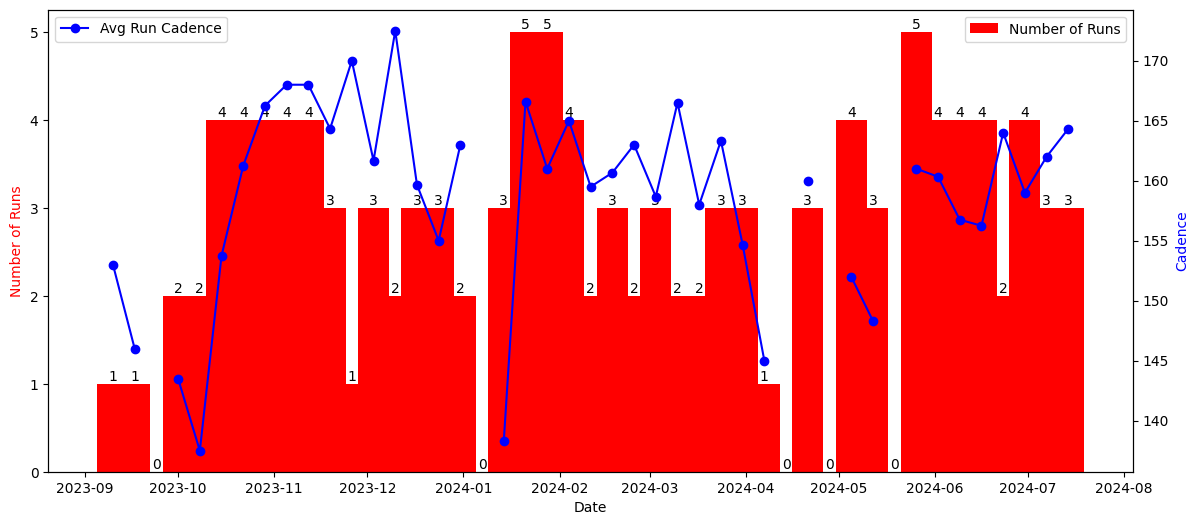

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(14,6))
# make a barplot
count = ax.bar(dfW['Date'], dfW['Count'],width=10, color='red',label='Number of Runs')
ax.bar_label(count)
# set x-axis label
ax.set_xlabel('Date')
ax.legend()
# set y-axis label
ax.set_ylabel('Number of Runs',color='red')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfW['Date'],dfW['Avg Run Cadence'],color='blue',marker='o',label='Avg Run Cadence')
ax2.set_ylabel('Cadence',color='blue')
ax2.legend(loc=2)
plt.show()